# Exploring relationships

#This script contains the following

1.Importing libraries 

2.Importing cleaned data

3.Exploring relationships



# Importing visualization libraries and data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [12]:
df=pd.read_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.1\cleaned data\df_cleaned.pkl')

In [13]:
df.shape

(1795, 9)

# Exploring relationships

In [15]:
df.columns

Index(['Company', 'bean_origin', 'REF', 'review_date', 'cacao_percent',
       'company_location', 'Rating', 'bean_type', 'broad_bean_origin'],
      dtype='object')

In [16]:
sub=df[['REF', 'review_date','cacao_percent', 'Rating',]]

In [17]:
sub

,REF,review_date,cacao_percent,Rating
0,1876,2016,63.0,3.75
1,1676,2015,70.0,2.75
2,1676,2015,70.0,3.00
3,1680,2015,70.0,3.50
4,1704,2015,70.0,3.50
...,...,...,...,...
1790,647,2011,70.0,3.75
1791,749,2011,65.0,3.00
1792,749,2011,65.0,3.50
1793,781,2011,62.0,3.25


# Correlations

In [19]:
#Calculate the Correlation Matrix
corr_matrix = sub.corr()

In [20]:
corr_matrix

,REF,review_date,cacao_percent,Rating
REF,1.000000,0.985076,0.037791,0.101030
review_date,0.985076,1.000000,0.038177,0.099846
cacao_percent,0.037791,0.038177,1.000000,-0.164820
Rating,0.101030,0.099846,-0.164820,1.000000


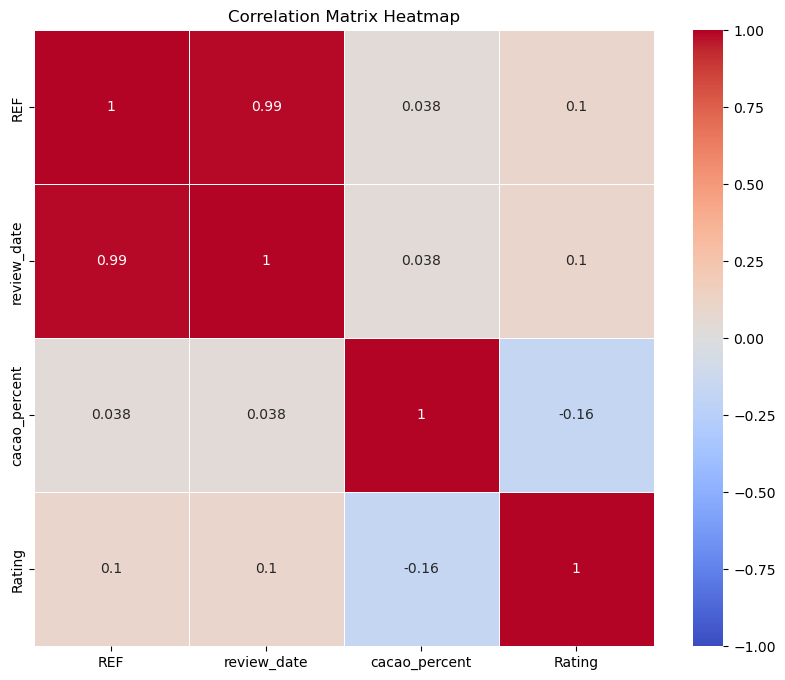

In [21]:
# Use seaborn to create a heatmap from the correlation matrix.
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The strongest relationship is between REF and review_date, which is expected since both variables are linked to the recency of the review.
    
The relationship between cacao_percent and Rating is mildly negative, hinting that higher cacao content may not always correspond to better ratings, though the effect is weak

Most other correlations are either very weak or negligible, indicating that the variables in this dataset do not show strong linear dependencies on each other.



# Scatterplots

1) REF vs. review_date: Strongest correlation (0.99).

2) cacao_percent vs. Rating: Though the correlation is weaker (-0.16), it still shows a noticeable trend and could be insightful to visualize.

Text(15.765624999999995, 0.5, 'Review Date')

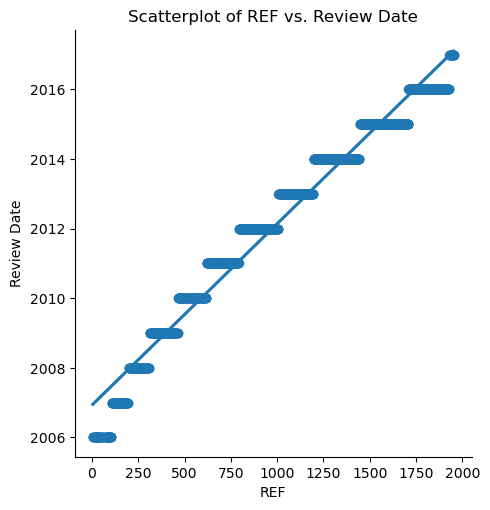

In [25]:
# 1: REF vs. Review Date (Strongest Positive Correlation)

sns.lmplot(x='REF', y='review_date', data=sub)
plt.title('Scatterplot of REF vs. Review Date')
plt.xlabel('REF')
plt.ylabel('Review Date')

The scatterplot shows a nearly perfect linear relationship between REF and review_date. This result is expected given the strong correlation coefficient (0.99).

Text(29.000000000000007, 0.5, 'Rating')

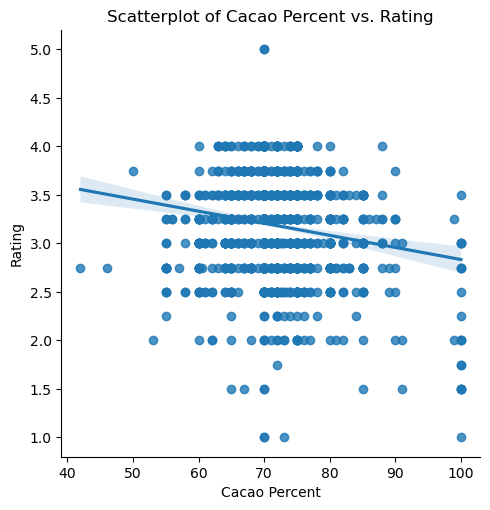

In [27]:
# 2: Cacao Percent vs. Rating (Weak Negative Correlation)

sns.lmplot(x='cacao_percent', y='Rating', data=sub)
plt.title('Scatterplot of Cacao Percent vs. Rating')
plt.xlabel('Cacao Percent')
plt.ylabel('Rating')


The scatterplot of cacao_percent vs. Rating shows a weak negative trend. As the cacao percentage increases, the ratings tend to slightly decrease.

 There may be a slight tendency for higher cacao chocolates to receive lower ratings.

# Pair plots

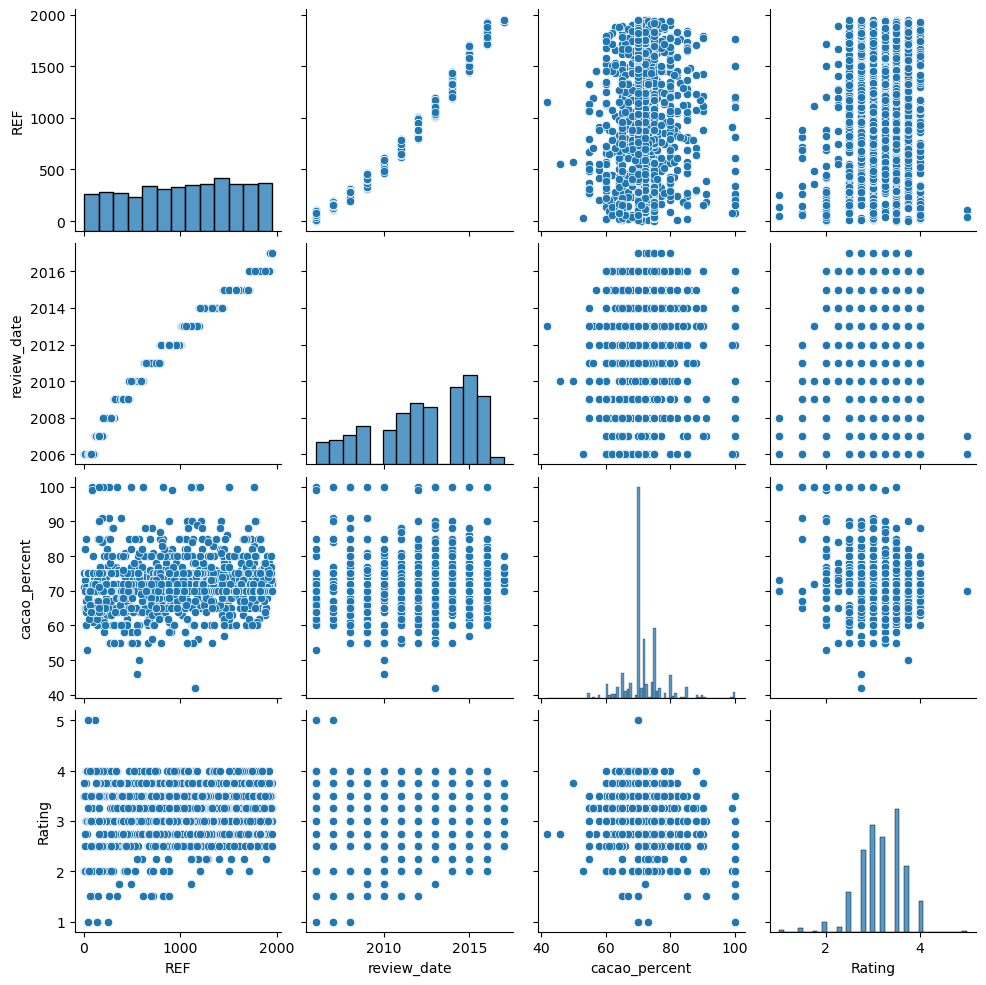

In [30]:
sns.pairplot(sub)

Key Observations from the Pair Plot:

#REF Distribution:

Shows a linear trend with more reviews in recent times.

#Review Date Distribution:

Similar to REF, confirming a strong correlation.

#Cacao Percent Distribution:

The distribution of cacao_percent remains bimodal, with two visible peaks, suggesting distinct categories of chocolate types.

#Rating Distribution:

Slightly skewed normal distribution, concentrated around ratings of 3-4.
Fewer reviews at the extreme ends (very low or very high ratings).



# Variables for Further Exploration:

#Cacao Percent and Rating:

Reason: The slight negative trend between these two variables could be explored further, potentially looking at non-linear relationships or breaking the data into groups (e.g., milk vs. dark chocolate)

#Review Date and Cacao Percent:

Reason: While not obvious in this plot, trends in cacao content over time (as seen through review dates) could be worth exploring. This might reveal shifts in the types of chocolate being produced or reviewed over the years.



# Categorical plots

Creating a categorical variable that splits the 'cacao_percent' column into categories

<Axes: xlabel='cacao_percent', ylabel='Count'>

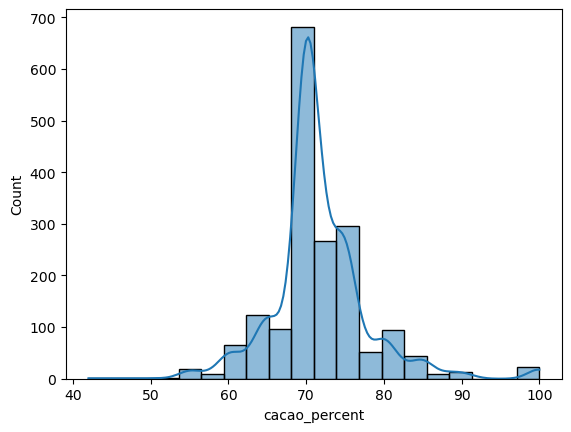

In [36]:
sns.histplot(df['cacao_percent'], bins = 20, kde = True)

In [37]:
df.loc[df['cacao_percent'] < 40, 'chocolate category'] = 'white chocolate'

In [38]:
df.loc[(df['cacao_percent'] >= 40) & (df['cacao_percent'] < 70), 'chocolate category'] = 'Mild chocolate'

In [39]:
df.loc[df['cacao_percent'] >= 70, 'chocolate category'] = 'Dark chocolate'

In [40]:
df['chocolate category'].value_counts(dropna = False)

chocolate category
Dark chocolate    1467
Mild chocolate     328
Name: count, dtype: int64

In [41]:
df.columns

Index(['Company', 'bean_origin', 'REF', 'review_date', 'cacao_percent',
       'company_location', 'Rating', 'bean_type', 'broad_bean_origin',
       'chocolate category'],
      dtype='object')

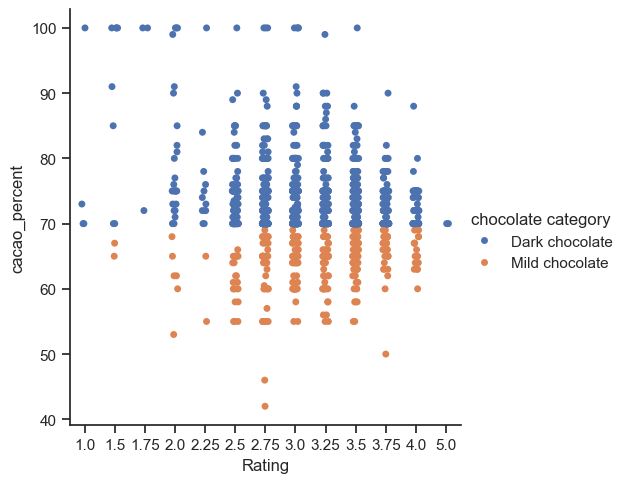

In [42]:
#Create a categorical plot in seaborn using the chocolate categories created above

sns.set(style="ticks")
g = sns.catplot(x="Rating", y="cacao_percent", hue="chocolate category", data=df)

Dark chocolate tends to have higher cacao percentages (60-100%) and a wider range of ratings (2.0-4.5).

Mild chocolate has lower cacao percentages (40-70%) and a narrower range of ratings (2.5-4.0)
.
There is significant overlap in ratings between dark and mild chocolate, suggesting that cacao percentage alone does not determine perceived qualit
y.
Most chocolates receive average to above-average ratings (3.0-4.
0).
A few outlidoes ers e in dark chocolate with higher cacao percent.

This indicates that there is no clear correlation between cacao percentage and rating for either category. It's possible that other factors, such as flavor profile, texture, and personal preference, play a more significant role in determining the perceived quality(rating) of chocolate.xist

# Hypothesis

1) Cacao Percentage Impact on Rating

   H0 (Null Hypothesis): The cacao percentage does not significantly affect the chocolate rating.

   H1 (Alternative Hypothesis): The cacao percentage has a significant effect on the chocolate rating.

2) Trend Over Time

   H0 (Null Hypothesis): There is no significant trend in chocolate ratings over the years.

   H1 (Alternative Hypothesis): There is a significant trend in chocolate ratings over the years

3) Rating based on review dates

   H0 (Null Hypothesis): Chocolate ratings do not exhibit any significant seasonal patterns or variations based on the review dates.

   H1 (Alternative Hypothesis): Chocolate ratings show significant seasonal patterns or variations, with ratings fluctuating during specific months or     seasons of the year.



In [46]:
df.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 6\Exc 6.2\df_cleaned_Expled_relationship.pkl')